# Assignment 4

In [284]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read gray image
img_gray = cv2.imread("./images/lena_gray.png", cv2.IMREAD_GRAYSCALE)

# Apply a filter kernel to image
def img_convolution(img, kernel, borderType=cv2.BORDER_REPLICATE, negative_values=True):
   padding = int((kernel.shape[0] - 1) / 2)
   img_pad = cv2.copyMakeBorder(img, padding, padding, padding, padding, borderType)
   
   res = np.zeros(img.shape)
   for x in range(img.shape[1]):
      for y in range(img.shape[0]):
         res[y, x] = pxl_convolution(x + padding, y + padding, img_pad, kernel, negative_values)

   return res

# Apply kernel to a pixel 
def pxl_convolution(x, y, img, kernel, negative_values=True):
   dx = int((kernel.shape[0]) / 2)
   r = 0
   for i in range(kernel.shape[0]):
      for j in range(kernel.shape[0]):
         r += img[y - dx + i, x - dx + j] * kernel[i, j]
   
   return r if negative_values else max(0, r)

## 1. Blurring by convolutions

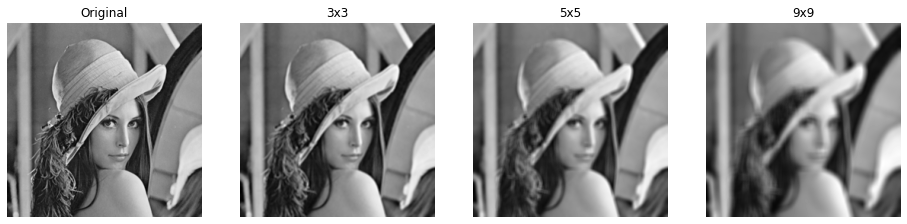

In [285]:
# Return a blur kernel filter
def blur_kernel(n):
   return np.ones((n, n)) / n**2

# Plot blur images
fig, axes = plt.subplots(1, 4, figsize=(16, 7))
[axi.set_axis_off() for axi in axes]
axes[0].imshow(img_gray, cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(img_convolution(img_gray, blur_kernel(3)), cmap="gray")
axes[1].set_title("3x3")
axes[2].imshow(img_convolution(img_gray, blur_kernel(5)), cmap="gray")
axes[2].set_title("5x5")
axes[3].imshow(img_convolution(img_gray, blur_kernel(9)), cmap="gray")
axes[3].set_title("9x9")
plt.savefig("images/results/assignment_4_mean.png")
plt.show()

The larger the kernel, the more the image becomes blurred, which is logical because more pixels are taken into account in the mean for each pixel of the destination image.

Before doing the convolution, the image is padded (by half of the kernel's size) by extending the image. There exists multiple other way to pad the image. The kernel is then passed on the paded image and it results with an image of the same size of the original.

## 2. Edge detection

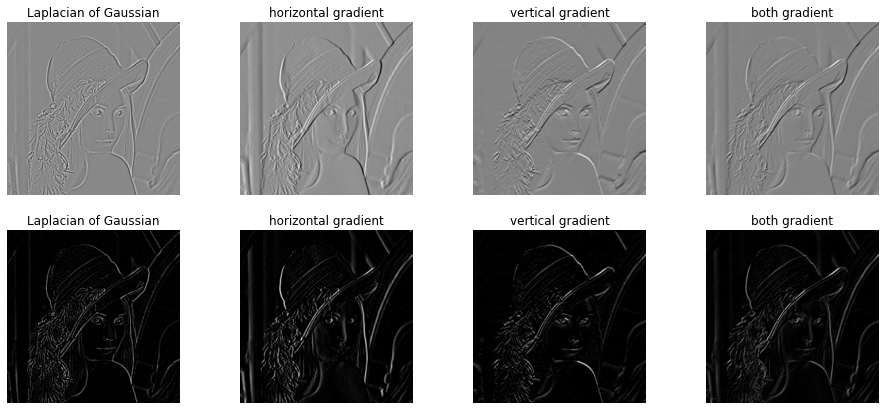

In [286]:
# Laplacian of Gaussian
lg_kernel = np.array([
   [0, 1, 1 ,1, 0], 
   [1, 3, 0 ,3, 1], 
   [1, 0,-24, 0, 1],
   [1, 3, 0, 3, 1], 
   [0, 1, 1, 1, 0]
])

# Horizontal gradient
h_kernel = np.array([
   [0, 0, 0],
   [-1, 0, 1],
   [0, 0, 0]
])

# Vertical gradient
v_kernel = np.array([
   [0, -1, 0],
   [0, 0, 0],
   [0, 1, 0]
])

# Apply gradient filter
img_h = img_convolution(img_gray, h_kernel)
img_v = img_convolution(img_gray, v_kernel)

# Plot images with Laplacian of Gaussian filter
fig, axes = plt.subplots(2, 4, figsize=(16, 7))
[axi.set_axis_off() for row in axes for axi in row]
axes[0][0].imshow(img_convolution(img_gray, lg_kernel), cmap="gray")
axes[0][0].set_title("Laplacian of Gaussian")

# Plot images with gradient filter
axes[0][1].imshow(img_h, cmap="gray")
axes[0][1].set_title("horizontal gradient")
axes[0][2].imshow(img_v, cmap="gray")
axes[0][2].set_title("vertical gradient")
axes[0][3].imshow(img_h + img_v, cmap="gray")
axes[0][3].set_title("both gradient")

# Same but clip negative values
img_h = img_convolution(img_gray, h_kernel, negative_values=False)
img_v = img_convolution(img_gray, v_kernel, negative_values=False)
axes[1][0].imshow(img_convolution(img_gray, lg_kernel, negative_values=False), cmap="gray")
axes[1][0].set_title("Laplacian of Gaussian")
axes[1][1].imshow(img_h, cmap="gray")
axes[1][1].set_title("horizontal gradient")
axes[1][2].imshow(img_v, cmap="gray")
axes[1][2].set_title("vertical gradient")
axes[1][3].imshow(img_h + img_v, cmap="gray")
axes[1][3].set_title("both gradient")

plt.savefig("images/results/assignment_4_edge.png")
plt.show()

To do a the Laplacian of Gaussian filter, I just take the kernel provided in the lecture and run the convolution function with it. The gradient filter works similarly but it is seperate in two kernels and then I just do an addition of both results.

The gradient filter is done in 2 steps but nevertheless remains less complex than Laplacian of Gaussian because the kernel is smaller: 
   - 3 * 3 * w * h * 2 < 5 * 5 * w * h  

The 2 filters manage to bring out the contours but the Laplacian of Gaussian filter seems however to detect more edges in the details.

## 3. Statistical filters

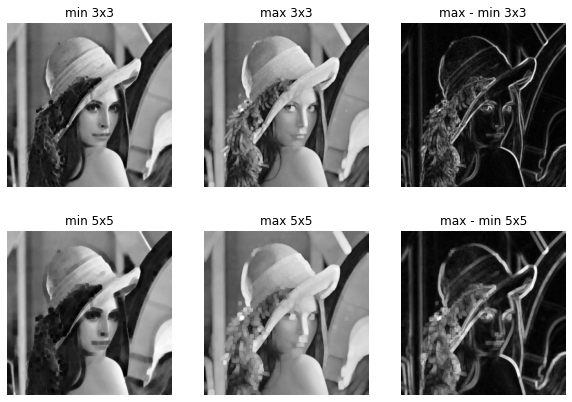

In [287]:
# Apply statistical filter to image
def rank_filter(img, n, func, borderType=cv2.BORDER_REPLICATE):
   padding = int((n - 1) / 2)
   img_pad = cv2.copyMakeBorder(img, padding, padding, padding, padding, borderType)
   
   res = np.zeros(img.shape)
   for x in range(img.shape[1]):
      for y in range(img.shape[0]):
         res[y, x] = func(neighbors(x + padding, y + padding, n, img_pad))

   return res

# Get pixel's neighbors
def neighbors(x, y, n, img):
   dx = int((n - 1) / 2)
   return img[y - dx : y + dx + 1, x - dx : x + dx + 1]

# Apply statistical filter on the image
img_min_3 = rank_filter(img_gray, 3, np.min)
img_min_5 = rank_filter(img_gray, 5, np.min)
img_max_3 = rank_filter(img_gray, 3, np.max)
img_max_5 = rank_filter(img_gray, 5, np.max)

# Plot
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
[axi.set_axis_off() for row in axes for axi in row]

axes[0][0].imshow(img_min_3, cmap="gray")
axes[0][0].set_title("min 3x3")
axes[0][1].imshow(img_max_3, cmap="gray")
axes[0][1].set_title("max 3x3")
axes[0][2].imshow(img_max_3 - img_min_3, cmap="gray")
axes[0][2].set_title("max - min 3x3")

axes[1][0].imshow(img_min_5, cmap="gray")
axes[1][0].set_title("min 5x5")
axes[1][1].imshow(img_max_5, cmap="gray")
axes[1][1].set_title("max 5x5")
axes[1][2].imshow(img_max_5 - img_min_5, cmap="gray")
axes[1][2].set_title("max - min 5x5")

plt.savefig("images/results/assignment_4_minmax.png")
plt.show()

The max filter makes the image whiter by thickening the bright parts. The min filter works the same way with black.
The combination of min and max brings out the edges similar to the gradient filter but brings out more edges. However, the image is a bit blurry.

A larger kernel size leads to thicker the areas bright or dark but makes the image more blurry.